<a href="https://colab.research.google.com/github/bhanugandham/SeqPrism_Bio/blob/main/BioAI_RNAQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to RNASeq Preliminary Analysis
##### RNA-Seq data analysis is the computational process of converting raw sequencing reads into meaningful biological insights about gene expression. It typically follows a bioinformatics workflow that includes quality control, alignment of reads, gene quantification, and statistical analysis. The analysis can help identify which genes are active within a biological sample, how their expression levels differ between conditions, and what biological pathways are affected.
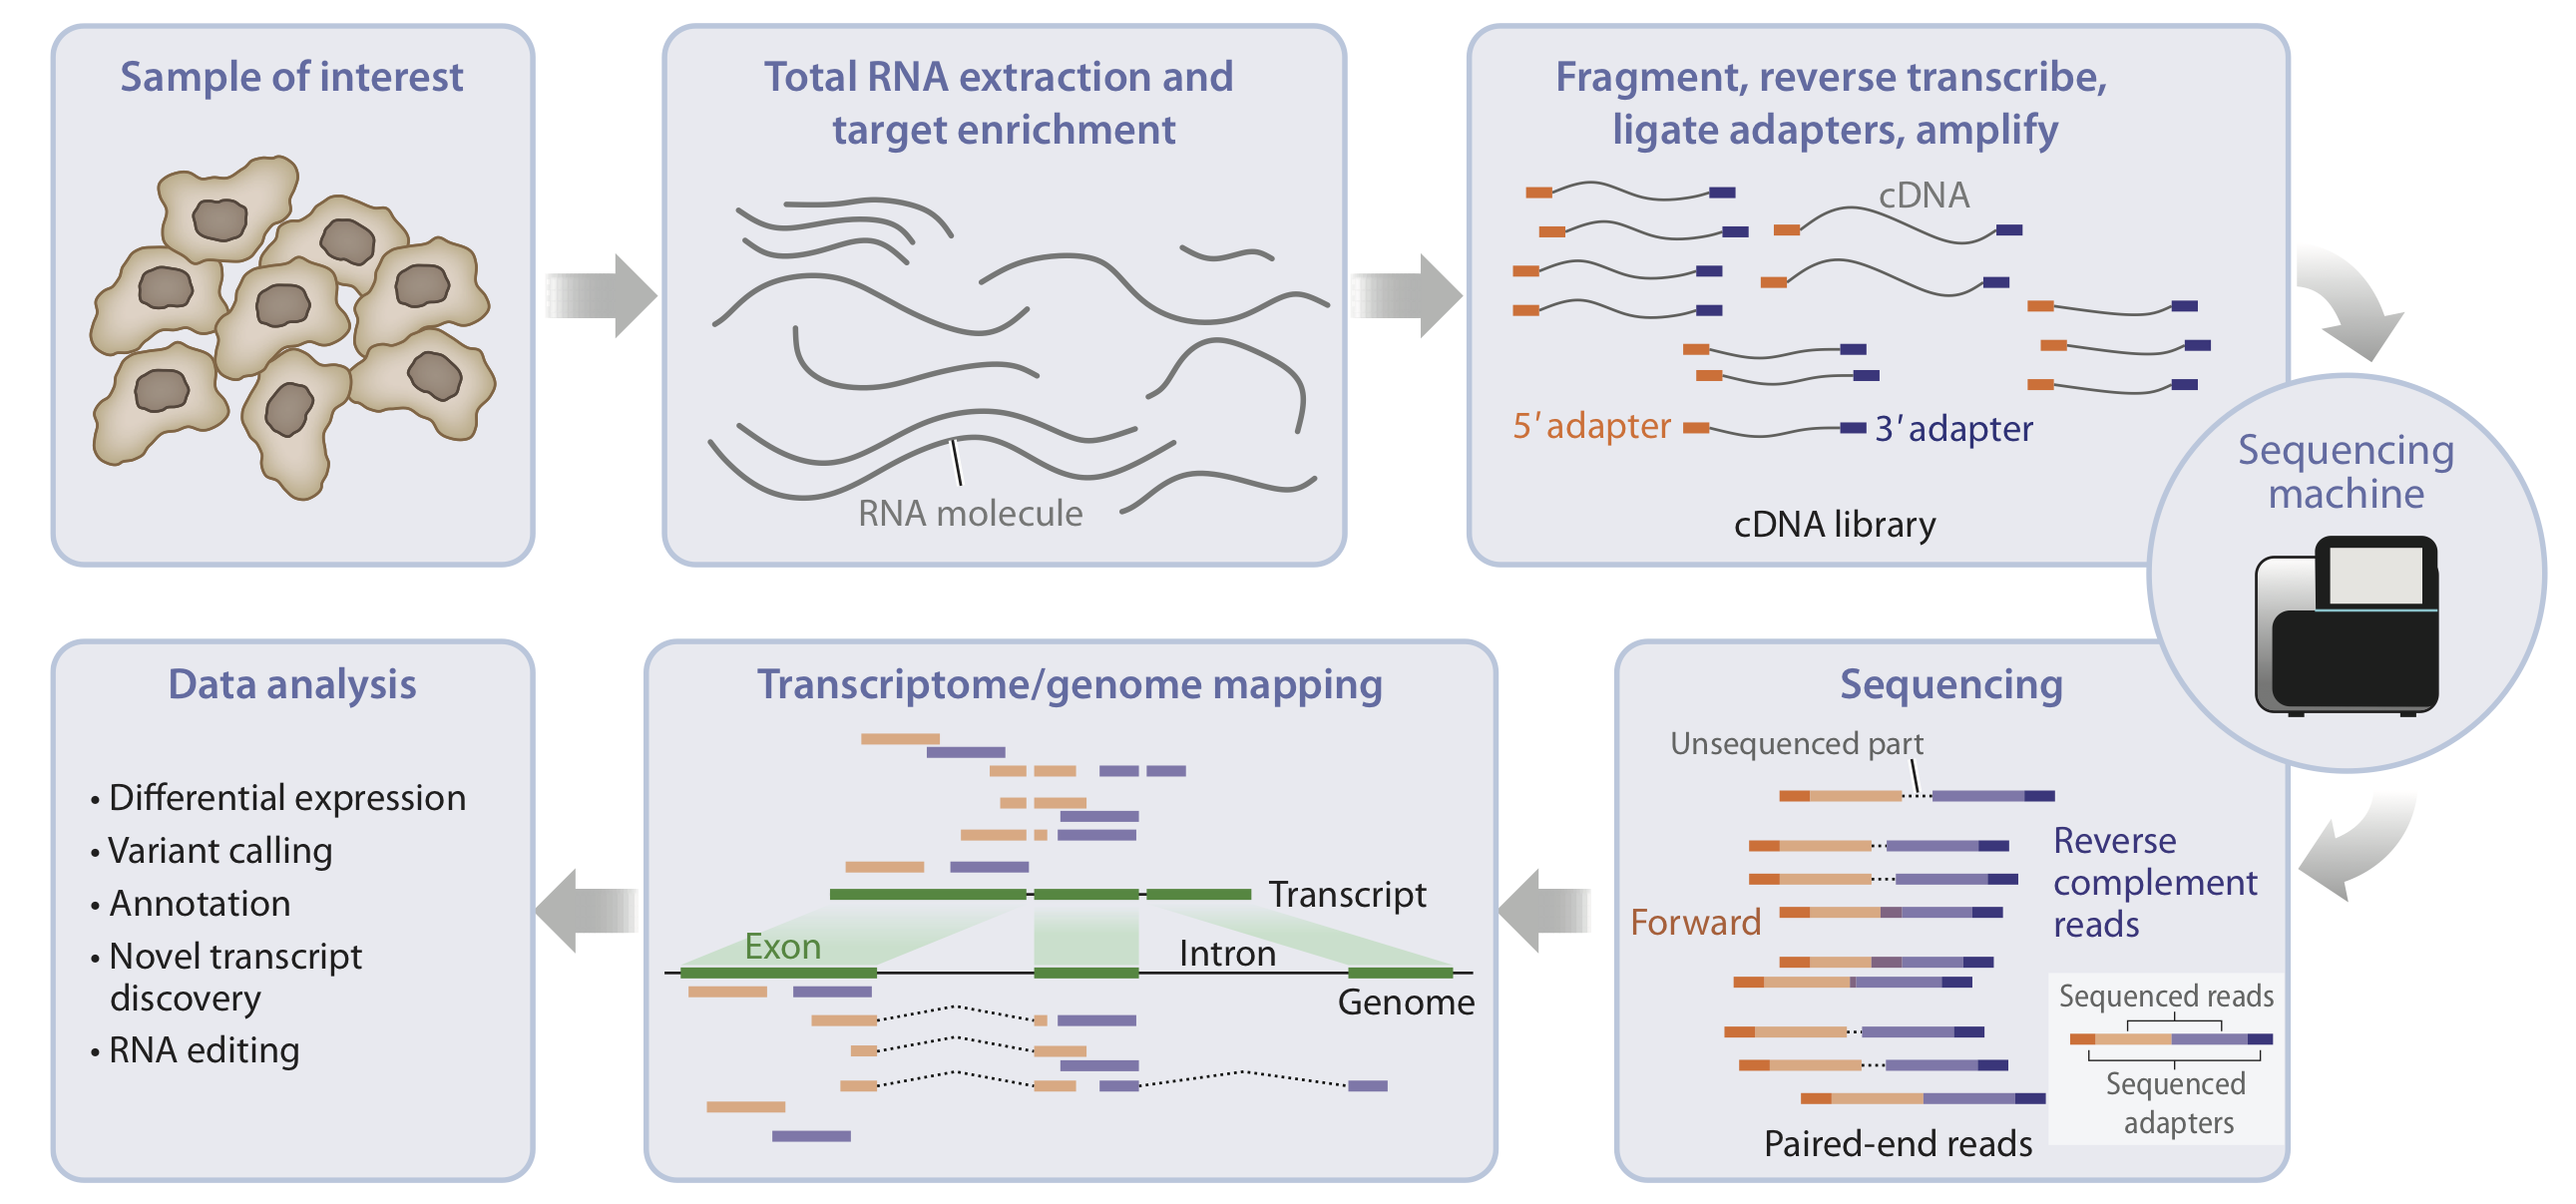

This colab notebook provides a **step-by-step guide** to download RNA-Seq data from the SRA database, convert it to FASTQ, and perform **quality control (QC)** using **FastQC** — all directly within **Google Colab**.

---

## Overview

**Workflow:**

1. Install required bioinformatics tools  
2. Download RNA-Seq data from NCBI SRA  
3. Convert `.sra` → `.fastq`  
4. Run **FastQC** for quality assessment  
5. View or download QC reports

---

## Step 1 — Install Required Tools


## Install FASTQC tool

In [18]:
!apt-get update
!apt-get install -y fastqc

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

## Check FASTQC tool versions:

In [19]:
!fastqc --version

FastQC v0.11.9


## Download and extract the latest version of the sratoolkit

In [20]:
!wget -q https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/current/sratoolkit.current-ubuntu64.tar.gz
!tar -xzf sratoolkit.current-ubuntu64.tar.gz

## Get the location of the sratoolkit

In [21]:
!ls

sample_data			    sratoolkit.current-ubuntu64.tar.gz.1
sratoolkit.3.2.1-ubuntu64	    SRR358747
sratoolkit.current-ubuntu64.tar.gz  SRR358747_1.fastq


## Add the sratoolkit to the path

In [22]:
import os
os.environ["PATH"] += ":/content/sratoolkit.3.2.1-ubuntu64/bin"

## Check to confirm the path has the toolkit

In [23]:
!echo $PATH  # optional, just to confirm

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/sratoolkit.3.2.1-ubuntu64/bin:/content/sratoolkit.3.2.1-ubuntu64/bin


## Check the version of the fastq-dump tool version. This tool is used to download SRA data from NCBI.

In [24]:
!which fastq-dump
!fastq-dump --version

/content/sratoolkit.3.2.1-ubuntu64/bin/fastq-dump

fastq-dump : 3.2.1



# Step 2 -- Download RNA-Seq data from NCBI SRA

In [25]:
# # Get Data
# # Install sra-tools
# !apt-get update && apt-get install -y sra-tools

# Fetch the sample run (replace SRRxxxxxx with your chosen run)
!prefetch SRR358747



2025-10-30T17:57:15 prefetch.3.2.1: 1) Resolving 'SRR358747'...
2025-10-30T17:57:16 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-10-30T17:57:16 prefetch.3.2.1: 1) 'SRR358747' is found locally 


# Step 3 -- Convert .sra → .fastq

In [28]:
# Convert to FASTQ
!fastq-dump --split-files SRR358747

Read 30206434 spots for SRR358747
Written 30206434 spots for SRR358747


# Step 4 -- Run FastQC for quality assessment

In [29]:
# 4. Run FastQC

!fastqc SRR358747_1.fastq SRR358747_2.fastq

Skipping 'SRR358747_2.fastq' which didn't exist, or couldn't be read
Started analysis of SRR358747_1.fastq
Approx 5% complete for SRR358747_1.fastq
Approx 10% complete for SRR358747_1.fastq
Approx 15% complete for SRR358747_1.fastq
Approx 20% complete for SRR358747_1.fastq
Approx 25% complete for SRR358747_1.fastq
Approx 30% complete for SRR358747_1.fastq
Approx 35% complete for SRR358747_1.fastq
Approx 40% complete for SRR358747_1.fastq
Approx 45% complete for SRR358747_1.fastq
Approx 50% complete for SRR358747_1.fastq
Approx 55% complete for SRR358747_1.fastq
Approx 60% complete for SRR358747_1.fastq
Approx 65% complete for SRR358747_1.fastq
Approx 70% complete for SRR358747_1.fastq
Approx 75% complete for SRR358747_1.fastq
Approx 80% complete for SRR358747_1.fastq
Approx 85% complete for SRR358747_1.fastq
Approx 90% complete for SRR358747_1.fastq
Approx 95% complete for SRR358747_1.fastq
Analysis complete for SRR358747_1.fastq


# Step 5 -- View or download QC reports

Found 9 PNG files.


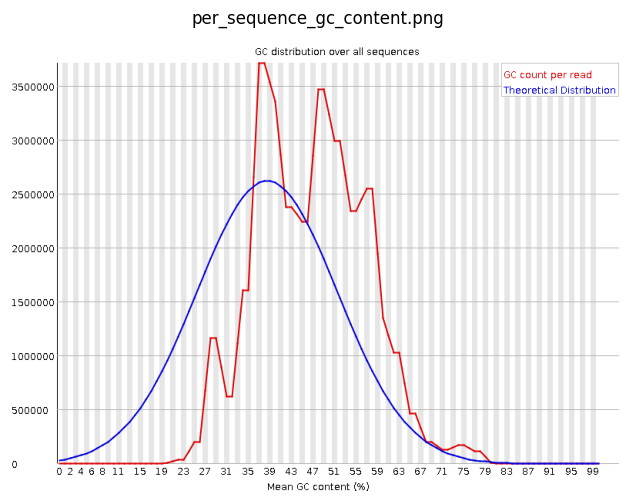

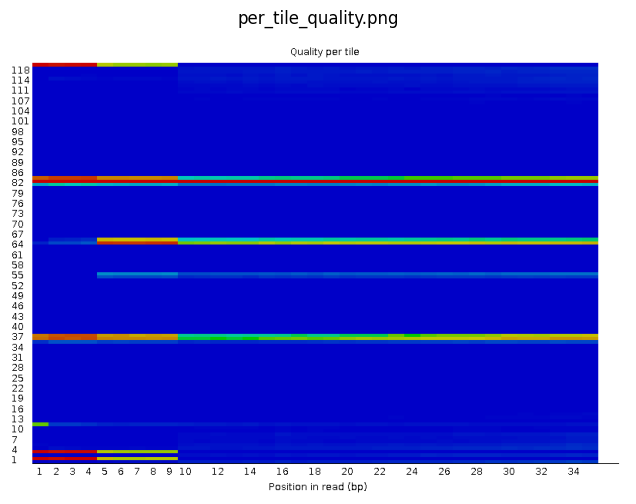

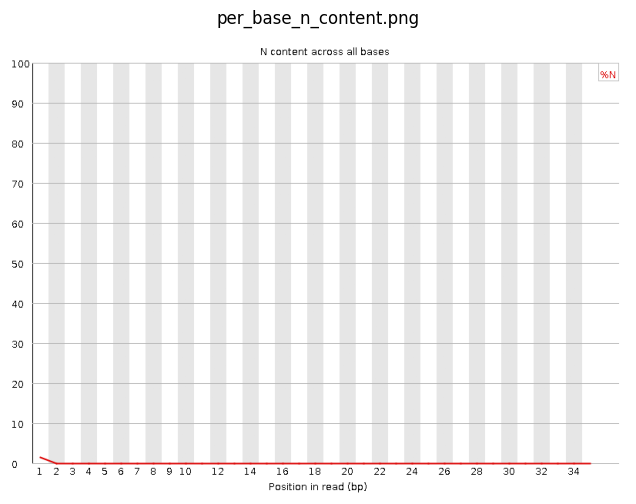

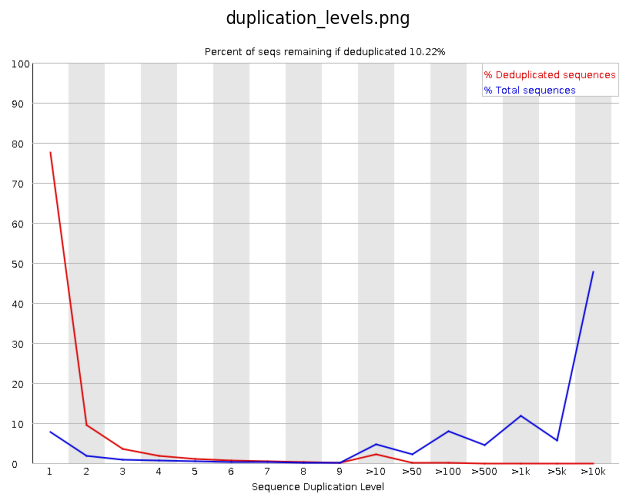

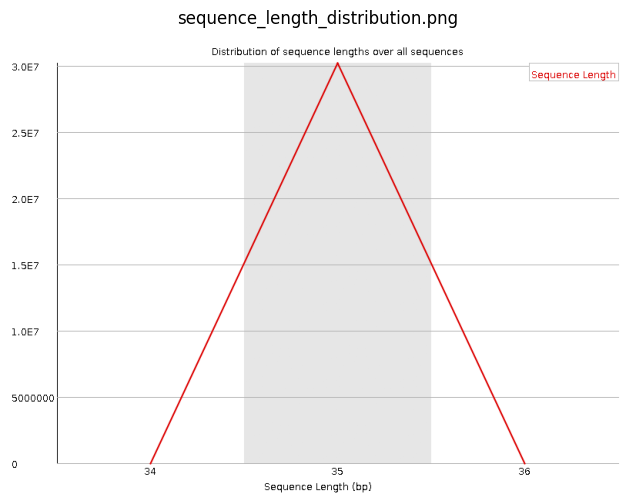

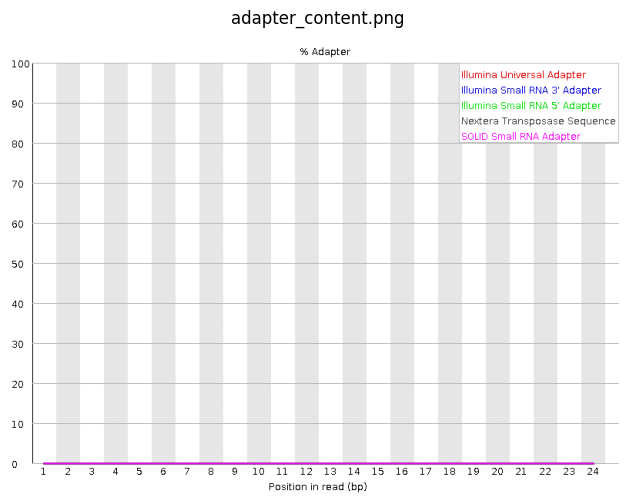

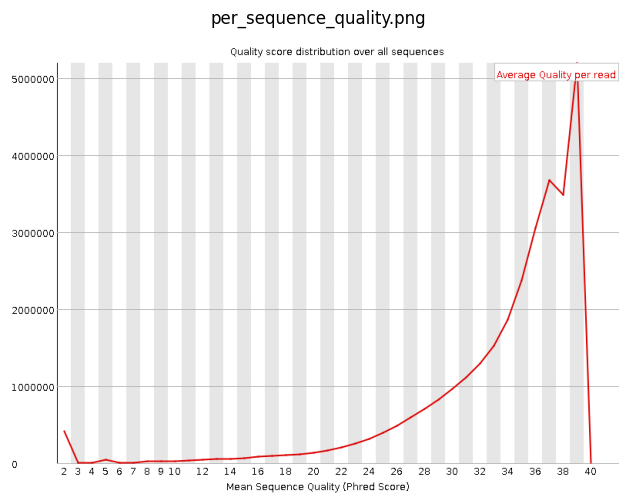

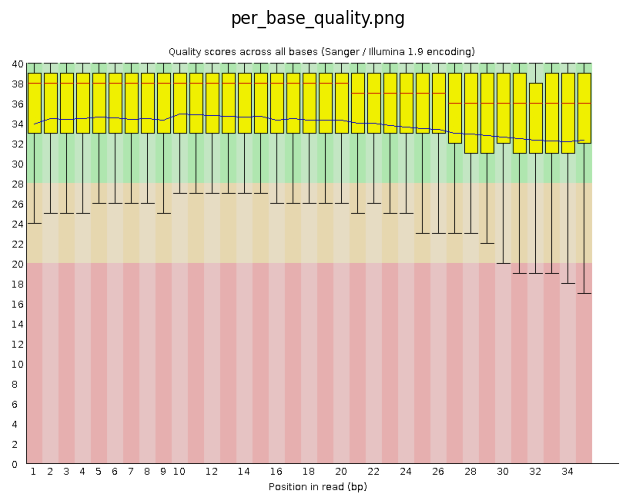

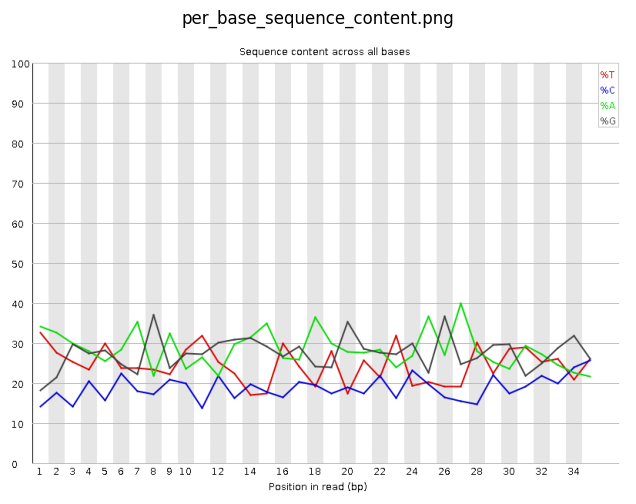

In [34]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your FastQC zip file
zip_path = "/content/SRR358747_1_fastqc.zip"  # change this to your filename

# 1. Unzip the FastQC report
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("fastqc_output")

# 2. Locate the images folder
images_dir = "fastqc_output/SRR358747_1_fastqc/Images"  # adjust name if different

# 3. List all PNG files
png_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]
print(f"Found {len(png_files)} PNG files.")

# 4. Display all PNG images
for file in png_files:
    img_path = os.path.join(images_dir, file)
    img = mpimg.imread(img_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(file)
    plt.show()
